1. Linear Equations in Linear Algebra

Computer science is intricately linked with linear algebra through the growth of parallel processing and large-scale computations.
System of linear equations is equivalent to a vector equation and to a matrix equation. This equivalence will reduce problems involving linear combinations of vectors to questions about systems of linear equations.

1.1 Systems of Linear Equations

Matrix Notation
The essential information of a linear system can be recorded in a rectangular array called a matrix

x1 - 2x2 + x3 = 0
2x2 - 8x3 = 8
5x1 - 5x3 = 10

In [3]:
coefficient_matrix = [
    [1, -2, 1],
    [0, 2, -8],
    [5, 0, -5]
]

print(coefficient_matrix)

[[1, -2, 1], [0, 2, -8], [5, 0, -5]]


In [4]:
augmented_matrix = [
    [1, -2, 1, 0],
    [0, 2, -8, 8],
    [5, 0, -5, 10]
]

print(augmented_matrix)

[[1, -2, 1, 0], [0, 2, -8, 8], [5, 0, -5, 10]]


augmented_matrix has 3 rows and 4 columns and is called a 3 x 4 matrix

Solving a Linear System

Three basic operations are used to simplify a linear system: 

1. Replace one equation by the sum of itself and a multiple of another equation
2. Interchange two equations
3. Multiply all the terms in an equation by a nonzero constant

In [6]:
augmented_matrix = [
    [1, -2, 1, 0],
    [0, 2, -8, 8],
    [5, 0, -5, 10]
]

print(augmented_matrix)

[[1, -2, 1, 0], [0, 2, -8, 8], [5, 0, -5, 10]]


In [14]:
augmented_matrix = [
    [1, 0, 0, 1],
    [0, 1, 0, 0],
    [0, 0, 1, -1]
]

print(augmented_matrix)

[[1, 0, 0, 1], [0, 1, 0, 0], [0, 0, 1, -1]]


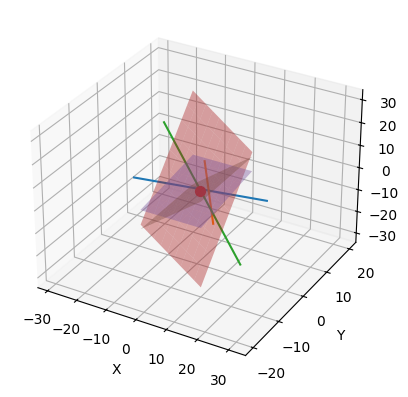

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la matriz aumentada del sistema lineal
A = np.array([[1, -2, 1, 0],
              [0, 2, -8, 8],
              [5, 0, -5, 10]])

# Extraer los coeficientes y los términos independientes
coeficientes = A[:, :-1]
independientes = A[:, -1]

# Calcular la solución del sistema
solucion = np.linalg.solve(coeficientes, independientes)

# Definir los puntos en los planos
x, y = np.meshgrid(np.linspace(-10, 10, 10), np.linspace(-10, 10, 10))

# Ecuaciones de los planos
z1 = (independientes[0] - coeficientes[0,0]*x - coeficientes[0,1]*y) / coeficientes[0,2]
z2 = (independientes[1] - coeficientes[1,0]*x - coeficientes[1,1]*y) / coeficientes[1,2]
z3 = (independientes[2] - coeficientes[2,0]*x - coeficientes[2,1]*y) / coeficientes[2,2]


# Crear la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Coeficientes de las rectas
rectas = np.array([
    [2, 1, 0.25, 0],
    [-1, 4, 1, 0],
    [3, 1, -2, 0]
])

# Generar puntos para cada recta
t_values = np.linspace(-10, 10, 100)  # Rango de valores de t
x_values = np.zeros((len(rectas), len(t_values)))
y_values = np.zeros((len(rectas), len(t_values)))
z_values = np.zeros((len(rectas), len(t_values)))

for i in range(len(rectas)):
    x_values[i] = rectas[i, 0] * t_values + rectas[i, 1]
    y_values[i] = rectas[i, 2] * t_values + rectas[i, 3]

for i in range(len(rectas)):
    ax.plot(x_values[i], y_values[i], z_values[i], )

# Graficar los planos
ax.plot_surface(x, y, z1, alpha=0.4)
ax.plot_surface(x, y, z2, alpha=0.4)
ax.plot_surface(x, y, z3, alpha=0.4)

# Calcular la intersección de los planos
interseccion = np.array([solucion[0], solucion[1], solucion[2]])

# Graficar el punto de intersección
ax.scatter(*interseccion, color='r', s=50)

# Configuración de la gráfica
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Mostrar la gráfica
plt.show()



In [18]:
print(solucion)

[ 1.  0. -1.]


Two matrices are called row equivalent if there is a sequence of elementary row operations that transforms one matrix into the other.

Existence and Uniqueness Questions
TWO FUNDAMENTAL QUESTIONS ABOUT A LINEAR SYSTEM
1. Is the system consistent; that is, does at least one solution exist?
2. If a solution exists, is it the only one; that is, is the solution unique?

Determine if the following system is consistent:

x1 - 2x2 + x3 = 0
2x2 - 8x3 = 8
5x1 - 5x3 = 10

In [79]:
augmented_matrix = [
    [1, -2, 1, 0],
    [0, 2, -8, 8],
    [5, 0, -5, 10]
]


# f3 = f3 - 5f1
augmented_matrix[2] = [x - 5 * y for x, y in zip(augmented_matrix[2], augmented_matrix[0])]

# f2 = (1/2)f2
augmented_matrix[1] = [x / 2 for x in augmented_matrix[1]]

# f3 = f3 - 10f2
augmented_matrix[2] = [x - 10 * y for x, y in zip(augmented_matrix[2], augmented_matrix[1])]

# f3 = f3/30
augmented_matrix[2] = [x / 30 for x in augmented_matrix[2]]


print(augmented_matrix)

[[1, -2, 1, 0], [0.0, 1.0, -4.0, 4.0], [0.0, 0.0, 1.0, -1.0]]


The new system has a triangular form

In [81]:
# Imprimir la matriz con alineación fija
for row in augmented_matrix:
    print(" ".join(["{:>5}".format(item) for item in row]))

    1    -2     1     0
  0.0   1.0  -4.0   4.0
  0.0   0.0   1.0  -1.0


At this point, we know x3. Were we to substitute the value of x3 into equation 2, we could compute x2 and hence could determine x1 from equation 1. So a solution exists; the system is consistent. (In fact, x2 is uniquely determined by equation 2 since x3 has only one possible value, and x1 is therefore uniquely determined by equation 1. So the solution is unique.)

Determine if the following system is consistent:

x2 - 4x3 = 8
2x1 -3x2 + 2x3 = 1
4x1 - 8x2 +12x3 = 1

In [89]:
augmented_matrix = [
    [0, 1, -4, 8],
    [2, -3, 2, 1],
    [4, -8, 12, 1]
]


# f2 = (2)f2 - f3
augmented_matrix[1] = [2 * x - y for x, y in zip(augmented_matrix[1], augmented_matrix[2])]

# f1 <-> f3
augmented_matrix[0], augmented_matrix[2] = augmented_matrix[2], augmented_matrix[0]

# f3 = 2f3 - f2
augmented_matrix[2] = [2 * x - y for x, y in zip(augmented_matrix[2], augmented_matrix[1])]

# Imprimir la matriz con alineación fija
for row in augmented_matrix:
    print(" ".join(["{:>5}".format(item) for item in row]))

    4    -8    12     1
    0     2    -8     1
    0     0     0    15


This system in triangular form obviously has a built-in contradiction. There are no values of x1; x2; x3 that satisfy the system because the equation 0 = 15 is never true. Since the final system and the original one have the same
solution set, the original system is inconsistent (i.e., has no solution).

1.2 ROW REDUCTION AND ECHELON FORMS

This section refines the method of Section 1.1 into a row reduction algorithm that will enable us to analyze any system of linear equations. By using only the first part of the algorithm, we will be able to answer the fundamental existence and uniqueness questions posed in Section 1.1.

Definition:

A rectangular matrix is in echelon form (or row echelon form) if it has the following three properties:

1. All nonzero rows are above any rows of all zeros.
2. Each leading entry of a row is in a column to the right of the leading entry of the row above it.
3. All entries in a column below a leading entry are zeros. 

If a matrix in echelon form satisfies the following additional conditions, then it is in reduced echelon form (or reduced row echelon form):

1. The leading entry in each nonzero row is 1.
2. Each leading 1 is the only nonzero entry in its column.

Theorem:
Uniqueness of the Reduced Echelon Form
Each matrix is row equivalent to one and only one reduced echelon matrix